In [1]:
%matplotlib inline
# import environment and expose in jupyter env
# this only works when shellvars is installed as it is in L-CAS Juptyer images
# https://github.com/LCAS/jupyterhub-deploy-docker/blob/master/singleuser/Dockerfile#L100

import shellvars
from os import environ

def loadenv(filename='/opt/ros/kinetic/setup.bash'):
    vs = shellvars.get_vars(filename)
    for v in vs:
        print('%s=%s' % (v.decode("utf-8"), str(vs[v].decode("utf-8"))))
        environ[v.decode("utf-8")] = str(vs[v].decode("utf-8"))

In [2]:
loadenv()


ROS_DISTRO=kinetic
PYTHONPATH=/opt/ros/kinetic/lib/python2.7/dist-packages
ROS_ETC_DIR=/opt/ros/kinetic/etc/ros
ROS_ROOT=/opt/ros/kinetic/share/ros
ROS_MASTER_URI=http://localhost:11311
ROS_VERSION=1
ROS_PACKAGE_PATH=/opt/ros/kinetic/share
PKG_CONFIG_PATH=/opt/ros/kinetic/lib/pkgconfig
PATH=/opt/ros/kinetic/bin:/opt/conda/envs/python2/bin:/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin
CMAKE_PREFIX_PATH=/opt/ros/kinetic
LD_LIBRARY_PATH=/opt/ros/kinetic/lib


In [3]:
# clean up sys path and add new paths from environ

import sys

# add system path

sys.path.append('/opt/conda/envs/python2/lib/python2.7/site-packages')
sys.path.append('/opt/conda/envs/python2/lib/python2.7/site-packages/scipy/signal/')
sys.path.append('/usr/lib/python2.7/dist-packages')


pp = environ['PYTHONPATH'].split(':')

sys.path = pp + sys.path 
new_sys_path = []
for p in sys.path:
    if p != '':
        if p not in new_sys_path:
            new_sys_path.append(p)
        
sys.path = new_sys_path



In [19]:
import rosbag_pandas
print sys.path

['/opt/ros/kinetic/lib/python2.7/dist-packages', '/opt/conda/envs/python2/lib/python27.zip', '/opt/conda/envs/python2/lib/python2.7', '/opt/conda/envs/python2/lib/python2.7/plat-linux2', '/opt/conda/envs/python2/lib/python2.7/lib-tk', '/opt/conda/envs/python2/lib/python2.7/lib-old', '/opt/conda/envs/python2/lib/python2.7/lib-dynload', '/home/jovyan/.local/lib/python2.7/site-packages', '/opt/conda/envs/python2/lib/python2.7/site-packages', '/opt/conda/envs/python2/lib/python2.7/site-packages/IPython/extensions', '/home/jovyan/.ipython', '/opt/conda/envs/python2/lib/python2.7/site-packages/scipy/signal/', '/usr/lib/python2.7/dist-packages']


No handlers could be found for logger "rosout"


In [20]:
#!curl 'https://lcas.lincoln.ac.uk/owncloud/index.php/s/j8TdpaKDIV7iJVW/download?path=%2F&files=2019-06-26-15-38-59.bag&downloadStartSecret=2n36zxq8jqv' -H 'Connection: keep-alive' -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'Upgrade-Insecure-Requests: 1' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.46 Safari/537.36' -H 'Sec-Fetch-Mode: navigate' -H 'Sec-Fetch-User: ?1' -H 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3' -H 'Sec-Fetch-Site: same-origin' -H 'Accept-Encoding: gzip, deflate, br' -H 'Accept-Language: en-GB,en-US;q=0.9,en;q=0.8,de;q=0.7' -H 'Cookie: oc_sessionPassphrase=LqUmDcJ8UdXRdeFjtoygOreWMJ3jEhS7mS4J%2Fwpv%2BGgfdUY%2Ffi00grjq2hpsnchPX2Bz19vdj%2FYF%2B2rjfD%2FLCjyeG2sDmcp%2FdtRDu4SYFztqsDbS8fM%2B6zQooFWKwDmX; 52f1fb9ec028b=vtnmqfsv9dfd7ej8neqehjs8q2; _ga=GA1.3.829609772.1562086655; _gid=GA1.3.855889859.1562086655; jupyterhub-session-id=3f18171364b64b9e840b18425196d26c; _xsrf=2|ab601de3|bdf3ea6e1189c1581d8a428ce8693378|1562139981' --compressed > /tmp/bag.bag
#https://lcas.lincoln.ac.uk/owncloud/index.php/s/j8TdpaKDIV7iJVW/download?path=%2F&files=2019-06-26-15-38-59.bag
!curl 'https://lcas.lincoln.ac.uk/owncloud/index.php/s/j8TdpaKDIV7iJVW/download?path=%2F&files=2019-06-26-15-38-59.bag' -H 'Connection: keep-alive' -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'Upgrade-Insecure-Requests: 1' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.62 Safari/537.36' -H 'Sec-Fetch-Mode: navigate' -H 'Sec-Fetch-User: ?1' -H 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3' -H 'Sec-Fetch-Site: same-origin' -H 'Accept-Encoding: gzip, deflate, br' -H 'Accept-Language: en-GB,en-US;q=0.9,en;q=0.8,de;q=0.7' -H 'Cookie: 52f1fb9ec028b=oqbdltdss49kssj8s8uhakb0b6; oc_sessionPassphrase=WM50S4YZM1BMMZzBV%2B0Pmg2DPzIYbEbW7Xi8bfkgOYdNt0wajz9XeUes4h%2F%2F%2Bid3MQG67ipRRGB6%2FDlane1hpWMpNGrMtmaCs5wpmDgVAMlZMf4uI4JlUaodNw2C0Qk0' --compressed


dataframe = rosbag_pandas.bag_to_dataframe('/tmp/bag.bag', include=['/imu/data', '/odometry/base_raw'])

In [60]:
df = dataframe.filter(regex=(".*linear.*_[xyz]"))
display(df.columns)
#smooth = df.ewm(span = 5).mean()
#smooth[u'imu_data__linear_acceleration_x'].plot()


Index([u'imu_data__linear_acceleration_x', u'imu_data__linear_acceleration_y',
       u'imu_data__linear_acceleration_z',
       u'odometry_base_raw__twist_twist_linear_x',
       u'odometry_base_raw__twist_twist_linear_y',
       u'odometry_base_raw__twist_twist_linear_z'],
      dtype='object')

In [177]:
df = df.sort_index()


df_odom_ax = df['odometry_base_raw__twist_twist_linear_x']
#df_odom_ax = df_odom_ax[df_odom_ax.notnull()]
df_odom_ax = df_odom_ax.interpolate(axis=0, method='linear')

df_odom_dax = df_odom_ax.diff() / df_odom_ax.index.to_series().diff().dt.total_seconds()
#display(df.index.to_series().diff().dt.total_seconds())
#display(df_odom_dax)

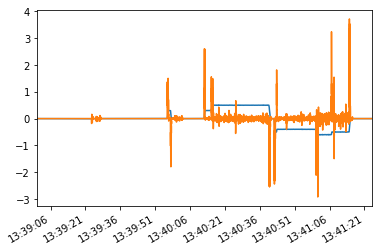

In [178]:
#display(df_odom_ax)
df_odom_ax.plot()
df_odom_dax.plot()
#df_odom_ax.index.to_series().diff().plot()
#(smooth[u'imu_data__linear_acceleration_x']).plot()

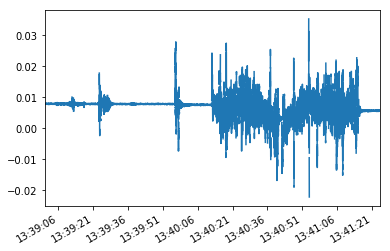

In [185]:
df[u'imu_data__linear_acceleration_x'].plot()


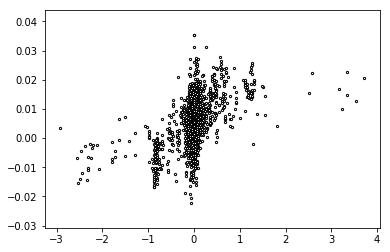

In [195]:
import matplotlib.pyplot as plt

plt.scatter(df_odom_dax, df[u'imu_data__linear_acceleration_x'], c='white', s=5, edgecolors='k')

In [ ]:
dataframe.to_csv('imu.csv')

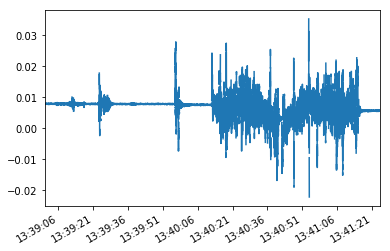

In [22]:
df[u'imu_data__linear_acceleration_x'].plot()

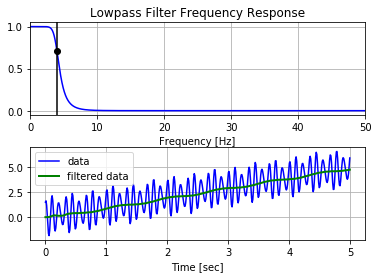

In [142]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_pass(cutoff, fs, order=5, btype='lowpass'):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype=btype, analog=False)
    return b, a

def butter_pass_filter(data, cutoff, fs, order=5, btype='lowpass'):
    b, a = butter_pass(cutoff, fs, order=order, btype=btype)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 100.0       # sample rate, Hz
cutoff = 4  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_pass(cutoff, fs, order, btype='low')

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t)*.1+t + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_pass_filter(data, cutoff, fs, order, btype='low')

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()





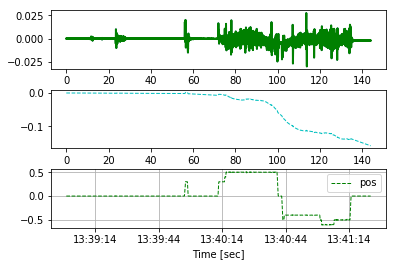

In [174]:
t = (df.index.values
            - df.index.values.astype('datetime64[D]'))/np.timedelta64(1,'s')
t = t - np.min(t)

#data=np.sqrt(
#    np.multiply(df[u'imu_data__linear_acceleration_x'], df[u'imu_data__linear_acceleration_x']) +
#    np.multiply(df[u'imu_data__linear_acceleration_y'], df[u'imu_data__linear_acceleration_y']) +
#    np.multiply(df[u'imu_data__linear_acceleration_z'], df[u'imu_data__linear_acceleration_z'])
#)

data = df[u'imu_data__linear_acceleration_x']

data = data.dropna()
t = (data.index.values
            - data.index.values.astype('datetime64[D]'))/np.timedelta64(1,'s')
t = t - np.min(t)
data = data - np.median(data[0])
#t=df['sec'].values
y = data
#y = butter_pass_filter(data, cutoff, fs, order)
#y = butter_pass_filter(y, .1, fs, order, btype='high')
td = np.diff(t, prepend=0)
p = np.cumsum(data)
# integrate acceleration into velocity
v = np.cumsum(np.multiply(y,td))
# integrate velocity into position
pos = np.cumsum(np.multiply(v,td))

plt.subplot(3, 1, 1)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
#plt.plot(t, p, 'r-', linewidth=1, label='pos')
plt.subplot(3, 1, 2)
plt.plot(t, v, 'c--', linewidth=1, label='pos')

plt.subplot(3, 1, 3)
df_odom_ax = df[u'odometry_base_raw__twist_twist_linear_x']
df_odom_ax = df_odom_ax.dropna()
plt.plot(df_odom_ax.index.values, df_odom_ax, 'g--', linewidth=1, label='pos')

plt.xlabel('Time [sec]')
plt.grid()
plt.legend()
#display(t)

plt.subplots_adjust(hspace=0.35)
plt.show()